
   #  PREDICT CREDIT CARD APPROVAL
1.Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
Predicting credit card approval is crucial for banks and financial institutions for several reasons:

1.Risk Assessment: Banks need to assess the risk associated with lending money. Predicting a client's creditworthiness helps in understanding the likelihood of repayment. This prediction reduces the risk of defaults and non-payments, which could lead to financial losses for the bank.

2.Efficiency in Decision-Making: By using predictive models, banks can efficiently process a large number of applications. Automated approval processes based on predictions enable faster decisions, improving customer satisfaction and reducing processing time.

3.Cost Reduction: Banks can focus their efforts on clients with a higher likelihood of repayment, reducing collection costs and the need for extensive recovery procedures.

4.Targeted Marketing and Offerings: Predictive models also assist in understanding consumer behavior and preferences. Banks can tailor their offerings, such as credit limits or interest rates, to attract and retain valuable customers, enhancing their competitive edge.

5.Regulatory Compliance: Banks are subject to regulatory standards and are required to lend responsibly. Predictive models help in ensuring compliance with regulations by making informed decisions based on relevant data and risk analysis.

In today's data-driven world, leveraging machine learning and predictive analytics enables banks to sift through vast amounts of data, improving accuracy in credit assessment. It's essential for a bank's sustainability and success to minimize bad debt while maximizing lending to creditworthy individuals, making the prediction of good clients an invaluable asset in the financial sector.

Q2.How is it going to impact the banking sector?
The impact of credit card approval prediction on the banking sector is profound and multi-faceted:
* Improved Risk Management
* Enhanced Customer Experience
* Cost Efficiency
* Competitive Advantage
* Regulatory Compliance
* Innovation in Lending Products
* Reduction in Fraud:

Q.3 If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.
 there are certain gaps or challenges that banks might face while implementing AI:
 * Data Privacy and Security: Handling sensitive financial data requires robust security measures to ensure customer information remains safe from cyber threats.

* Regulatory Compliance: Banks need to adhere to strict regulatory frameworks when implementing AI to ensure compliance with data protection laws and financial regulations.

* Skill Gap: Developing and maintaining AI systems requires specialized skills, which might be lacking in the current workforce. Banks might need to invest in training or hiring AI talent.

* Ethical Use of AI: Ensuring that AI systems are used ethically and do not reinforce biases is crucial. Banks need to monitor and mitigate any biases present in AI algorithms.


INITIAL HYPOTHESIS --
 HYPOTHESIS 1.Applicants income,Education and Employment status weather they are Working or not are crucial factors influencing credit card approval decision.
 HYPOTHSIS 2.Applicant with higher number of family member have higher chances of getting credit card approval.

DATA ANALYSIS APPROACH

1. Business Problem Understanding

2. Data Understanding & Data Exploration

3. Data Preprocessing
	Data Cleaning
  Data Wrangling
  Train test split
	Scaling

4. Modelling

5. Prediction + Evaluation

FEATURE Engineering Techniques
1. Data Cleaning
	Treating wrong data
  Treating missing values
  Treating outliers

2. Data Wrangling ==> Data Transformations
	- Encoding
	- Discretization
	- Feature Transformations
	- Feature Scaling

Encoding: converting categorical data into numeric
Discretization: coverting continous feature into discrete categorical
Feature Transformation : converting the skewed data (whether its right skewed or left skewed)
                         into normal distributed data

(only for continous variable)
how to check, whether the data is skewed data or not?

 1. check skewness value
  	if skewness is between -1 to +1 --normally distributed data
    if skewness is <-1  ---> left skewed
    if skewness is >+1  ---> right skewed
	2. Check density Curve

Convert:
how to convert skewed data to normal distributed data

for Right skewed data ---> apply log transformation  ==> np.log(feature)
					or
			   apply root transformation ==> df[feature]**(1/n)


for left skewed data ---> apply exp transformation  ==> np.exp(feature)
					or
			  apply power transformation ==> df[feature]**(n)

box-cox transformation : can be applied on both right skewed & left skewed data

All ML Algorithms designed assuming the data is normal

Feature Scaling: converting the features which has
		 high magnitude data to low magnitude data
This can be done by Standardization and Normalization

MACHINE LEARNING APROACH
1.Logistic regression
2.Decision tree
3.Random Forest
4.Support Vector Machine

STEPS TO IMPROVE ACCURACY
1.Cross Validation score
2.Feature Engineering
3.Hyper parameter tunning
4.Model comparision


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
# loading the dataset

df1 = pd.read_csv('Credit_card.csv')


In [ ]:
df2 = pd.read_csv('Credit_card_label.csv')


In [ ]:
credit_data = pd.merge(df1,df2,on = 'Ind_ID')
data = credit_data.copy()

EDA --(Exploratory data analysis)

In [ ]:
# EDA --(Exploratory data analysis)
data.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [ ]:
data.tail()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0

In [ ]:
data.shape

(1548, 19)

In [ ]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
data.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
data.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
data.duplicated().any()

False

# Handling Missing values

In [ ]:
# Handling Missing values
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# Handling Missing Values
data.GENDER.mode()

0    F
Name: GENDER, dtype: object

In [ ]:
data['GENDER']=data['GENDER'].fillna('F')

In [ ]:
data.groupby('Type_Income').Annual_income.mean()

Type_Income
Commercial associate    234600.000000
Pensioner               155175.096226
State servant           211422.413793
Working                 181048.757306
Name: Annual_income, dtype: float64

In [ ]:
# replacing null values by mean
data['Annual_income']=data.Annual_income.fillna(data.Annual_income.mean())
data.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
data['Type_Occupation'].unique()  # it is multidimension so difficult to replace it

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [ ]:
data.groupby('label')['Type_Occupation'].value_counts()

label  Type_Occupation      
0      Laborers                 240
       Core staff               151
       Managers                 122
       Sales staff              112
       Drivers                   77
       High skill tech staff     58
       Medicine staff            47
       Accountants               39
       Cleaning staff            20
       Security staff            17
       Private service staff     17
       Cooking staff             17
       Secretaries                9
       Low-skill Laborers         7
       Waiters/barmen staff       4
       HR staff                   3
       Realty agents              2
1      Laborers                  28
       Core staff                23
       Managers                  14
       Sales staff               10
       Drivers                    9
       Security staff             8
       High skill tech staff      7
       Accountants                5
       Cooking staff              4
       Medicine staff             3

In [ ]:
data.describe(include='all')

Ind_ID GENDER Car_Owner Propert_Owner     CHILDREN  \
count   1.548000e+03   1548      1548          1548  1548.000000   
unique           NaN      2         2             2          NaN   
top              NaN      F         N             Y          NaN   
freq             NaN    980       924          1010          NaN   
mean    5.078920e+06    NaN       NaN           NaN     0.412791   
std     4.171759e+04    NaN       NaN           NaN     0.776691   
min     5.008827e+06    NaN       NaN           NaN     0.000000   
25%     5.045070e+06    NaN       NaN           NaN     0.000000   
50%     5.078842e+06    NaN       NaN           NaN     0.000000   
75%     5.115673e+06    NaN       NaN           NaN     1.000000   
max     5.150412e+06    NaN       NaN           NaN    14.000000   

        Annual_income Type_Income                      EDUCATION  \
count    1.548000e+03        1548                           1548   
unique            NaN           4                              5   
top               NaN     Working  Secondary / secondary special   
freq              NaN         798                           1031   
mean     1.913993e+05         NaN                            NaN   
std      1.124080e+05         NaN                            NaN   
min      3.375000e+04         NaN                            NaN   
25%      1.215000e+05         NaN                            NaN   
50%      1.710000e+05         NaN                            NaN   
75%      2.250000e+05         NaN                            NaN   
max      1.575000e+06         NaN                            NaN   

       Marital_status       Housing_type  Birthday_count  Employed_days  \
count            1548               1548     1526.000000    1548.000000   
unique              5                  6             NaN            NaN   
top           Married  House / apartment             NaN            NaN   
freq             1049               1380             NaN            NaN   
mean              NaN                NaN   -16040.342071   59364.689922   
std               NaN                NaN     4229.503202  137808.062701   
min               NaN                NaN   -24946.000000  -14887.000000   
25%               NaN                NaN   -19553.000000   -3174.500000   
50%               NaN                NaN   -15661.500000   -1565.000000   
75%               NaN                NaN   -12417.000000    -431.750000   
max               NaN                NaN    -7705.000000  365243.000000   

        Mobile_phone   Work_Phone        Phone     EMAIL_ID Type_Occupation  \
count         1548.0  1548.000000  1548.000000  1548.000000            1060   
unique           NaN          NaN          NaN          NaN              18   
top              NaN          NaN          NaN          NaN        Laborers   
freq             NaN          NaN          NaN          NaN             268   
mean             1.0     0.208010     0.309432     0.092377             NaN   
std              0.0     0.406015     0.462409     0.289651             NaN   
min              1.0     0.000000     0.000000     0.000000             NaN   
25%              1.0     0.000000     0.000000     0.000000             NaN   
50%              1.0     0.000000     0.000000     0.000000             NaN   
75%              1.0     0.000000     1.000000     0.000000             NaN   
max              1.0     1.000000     1.000000     1.000000             NaN   

        Family_Members        label  
count      1548.000000  1548.000000  
unique             NaN          NaN  
top                NaN          NaN  
freq               NaN          NaN  
mean          2.161499     0.113049  
std           0.947772     0.316755  
min           1.000000     0.000000  
25%           2.000000     0.000000  
50%           2.000000     0.000000  
75%           3.000000     0.000000  
max          15.000000     1.000000

In [ ]:
data.isnull().sum()*100/len(data)

Ind_ID              0.000000
GENDER              0.000000
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       0.000000
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

In [ ]:
d=data[data['Type_Occupation'].isnull()]
# more than 30% of data is missing so we will drop it

In [ ]:
data= data.drop(['Mobile_phone','Work_Phone','Phone','EMAIL_ID','Ind_ID'],axis=1) # these columns are not important
data

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0         M         Y             Y         0   180000.00000   
1         F         Y             N         0   315000.00000   
2         F         Y             N         0   315000.00000   
3         F         Y             N         0   191399.32623   
4         F         Y             N         0   315000.00000   
...     ...       ...           ...       ...            ...   
1543      F         N             Y         0   191399.32623   
1544      F         N             N         0   225000.00000   
1545      M         Y             Y         2   180000.00000   
1546      M         Y             N         0   270000.00000   
1547      F         Y             Y         0   225000.00000   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

     Type_Occupation  Family_Members  label  
0                NaN               2      1  
1                NaN               2      1  
2                NaN               2      1  
3                NaN               2      1  
4                NaN               2      1  
...              ...             ...    ...  
1543        Managers               2      0  
1544     Accountants               1      0  
1545        Managers               4      0  
1546         Drivers               2      0  
1547             NaN               2      0  

[1548 rows x 14 columns]

In [ ]:
# Annual income and Employed_days are imp

# Feature Engineering

In [ ]:
data['Age'] = round((abs(data['Birthday_count'])/365),2)
data['Employed_days'] = round((abs(data['Employed_days'])/365),2)

data['Age']

0       51.43
1       37.14
2         NaN
3       37.14
4       37.14
        ...  
1543    32.76
1544    28.02
1545    36.09
1546    41.90
1547    45.48
Name: Age, Length: 1548, dtype: float64

In [ ]:
data['Employed_days']

0       1000.67
1          1.61
2          1.61
3          1.61
4          1.61
         ...   
1543       5.98
1544       3.31
1545       6.79
1546       1.77
1547       7.83
Name: Employed_days, Length: 1548, dtype: float64

In [ ]:
data.loc[data.Employed_days>44, 'Employed_days']=0  # here employed years is 1000 which is not possible

<Axes: xlabel='Employed_days', ylabel='Density'>

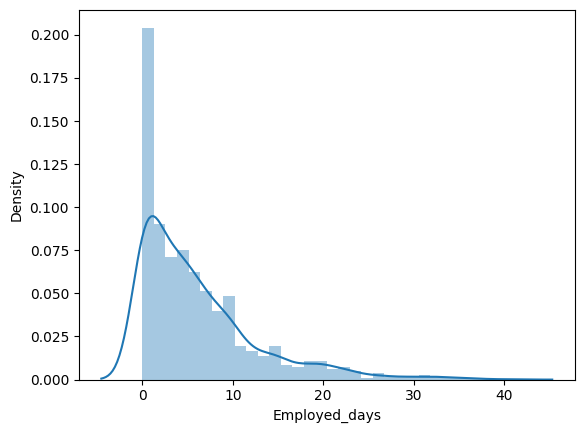

In [ ]:
sns.distplot(data['Employed_days'])

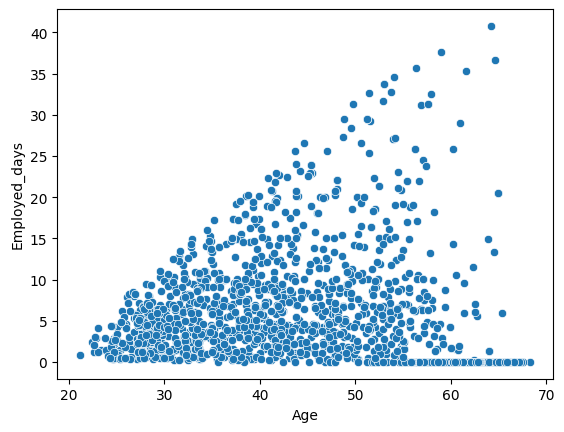

In [ ]:
sns.scatterplot(data =data,x=data['Age'],y=data['Employed_days'])
plt.show()

In [ ]:
data['Employed_days'].min(),data['Employed_days'].max()

(0.0, 40.79)

In [ ]:
data.Age.min(), data.Age.max()

(21.11, 68.35)

In [ ]:
# categorical data
data_cat1= data[['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type']]

In [ ]:
data_cat1.head()

GENDER Car_Owner Propert_Owner           Type_Income         EDUCATION  \
0      M         Y             Y             Pensioner  Higher education   
1      F         Y             N  Commercial associate  Higher education   
2      F         Y             N  Commercial associate  Higher education   
3      F         Y             N  Commercial associate  Higher education   
4      F         Y             N  Commercial associate  Higher education   

  Marital_status       Housing_type  
0        Married  House / apartment  
1        Married  House / apartment  
2        Married  House / apartment  
3        Married  House / apartment  
4        Married  House / apartment

In [ ]:
# numerical features
data_num1=data[['CHILDREN','Annual_income','Age','Employed_days','Family_Members','label']]
data_num1.head()

CHILDREN  Annual_income    Age  Employed_days  Family_Members  label
0         0   180000.00000  51.43           0.00               2      1
1         0   315000.00000  37.14           1.61               2      1
2         0   315000.00000    NaN           1.61               2      1
3         0   191399.32623  37.14           1.61               2      1
4         0   315000.00000  37.14           1.61               2      1

In [ ]:
def cat_unique(col=list(data_cat1.columns)):
  print(data_cat1[col].value_counts())
  plt.figure(figsize=(10,15))
  sns.countplot(x=data_cat1[col],hue=data['label'],data=data_cat1)

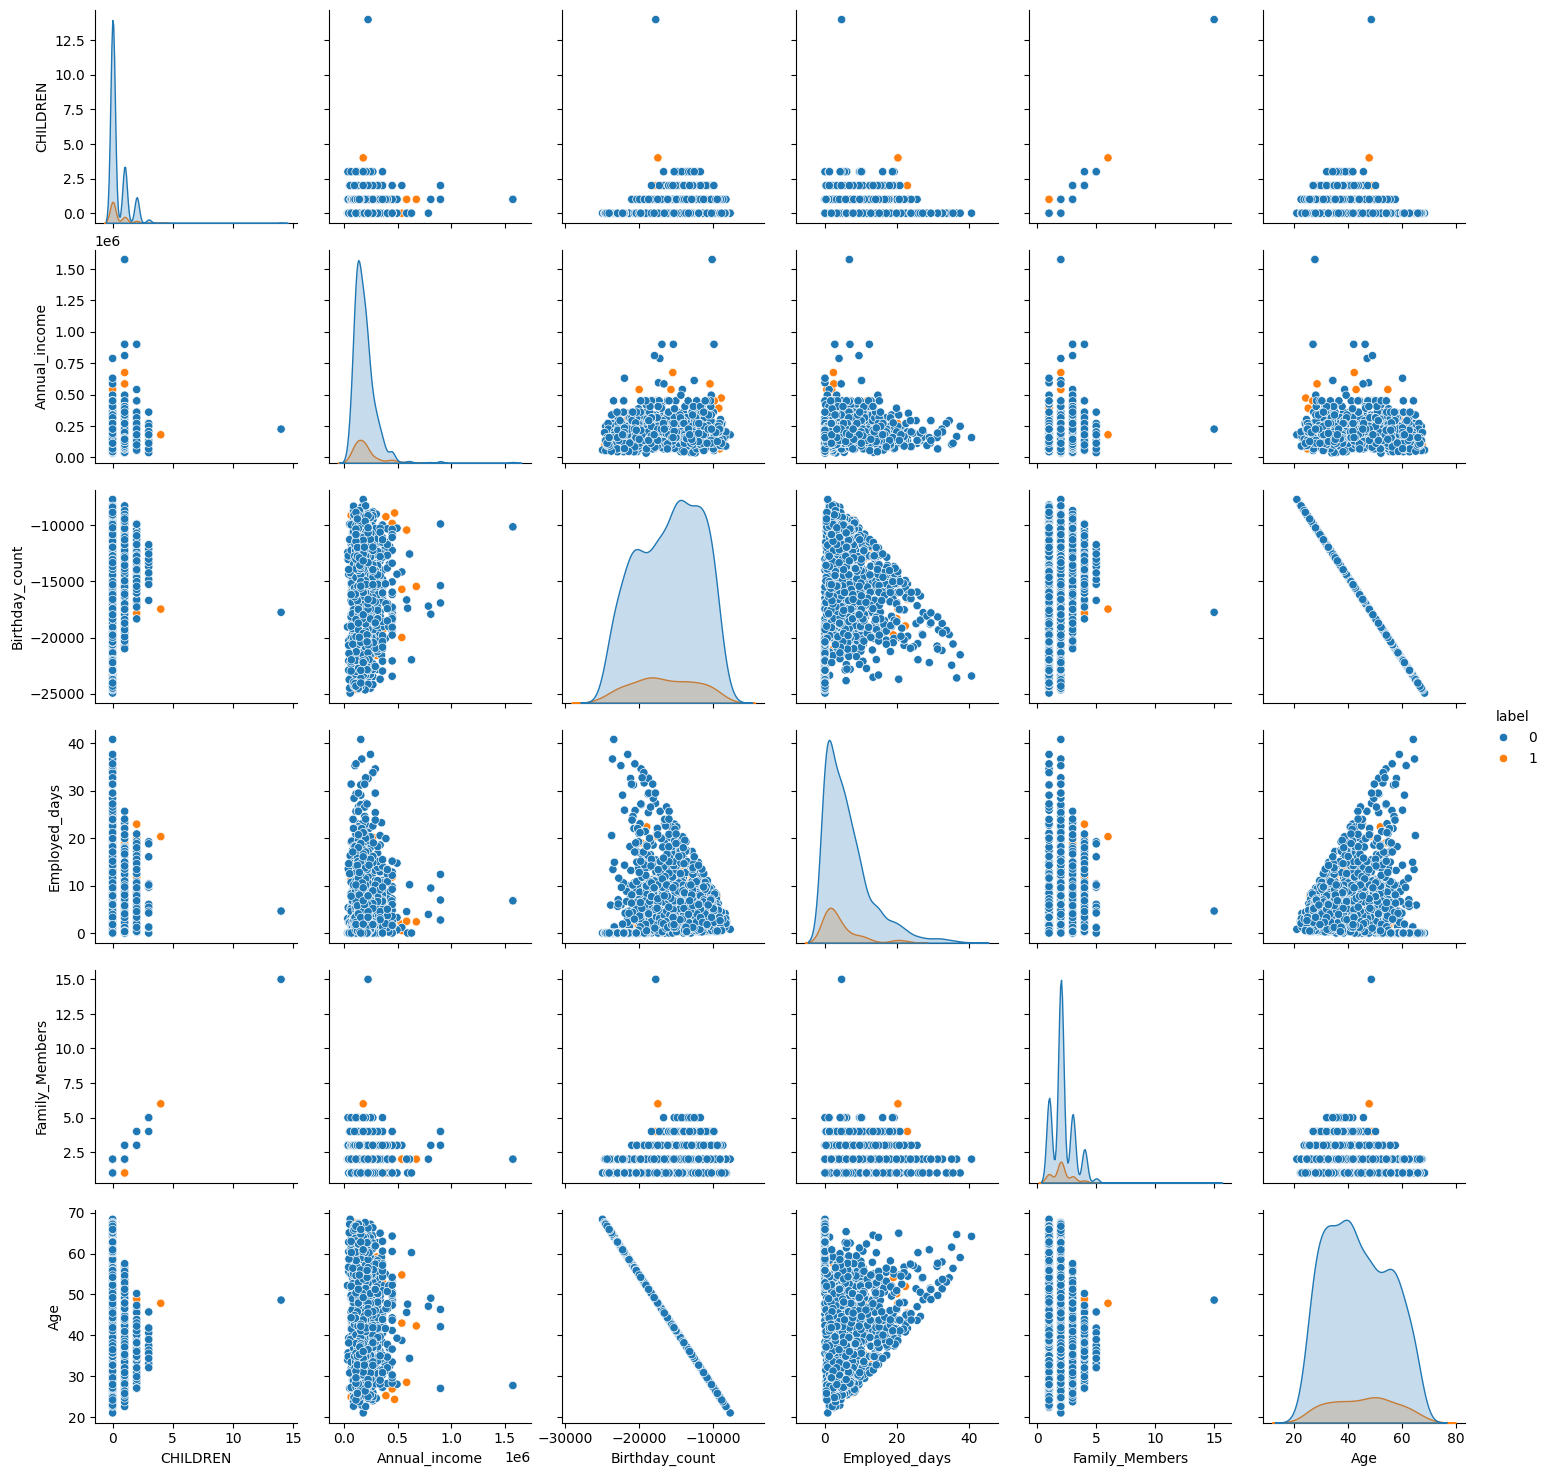

In [ ]:
sns.pairplot(data,hue='label')
plt.show()

Encoding

In [ ]:
# Encoding
data_cat1['GENDER']=data.GENDER.map({'M':1,'F':0})

In [ ]:
data_cat1['Car_Owner']=data.Car_Owner.map({'Y':1,'N':0})

In [ ]:
data_cat1['Propert_Owner']=data.Propert_Owner.map({'Y':1,'N':0})

In [ ]:
data['Type_Income'].value_counts()

Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64

In [ ]:
data_cat1['Marital_status'].value_counts()

Marital_status
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: count, dtype: int64

In [ ]:
data_cat1['Marital_status']=np.where(data_cat1['Marital_status'].isin(['Married','Civil marriage']),'Married',np.where(data_cat1['Marital_status'].isin(['Widow','Separated']),'Single(Married)','Single(Not_Married)'))

In [ ]:
data_cat1['Marital_status'].value_counts()

Marital_status
Married                1150
Single(Not_Married)     227
Single(Married)         171
Name: count, dtype: int64

In [ ]:
data_cat1['Marital_status']=data_cat1['Marital_status'].map({'Single(Not_Married)':0,'Married':1,'Single(Married)':2})

In [ ]:
data['Housing_type'].value_counts()

Housing_type
House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: count, dtype: int64

In [ ]:
data_cat1['Own_House']= np.where(data_cat1['Housing_type'].isin(['House / apartment','With parents ']),'Own_house','No_house')


In [ ]:
data_cat1['Own_House'].value_counts()

Own_House
Own_house    1380
No_house      168
Name: count, dtype: int64

In [ ]:
data_cat1['Own_House']=data_cat1['Own_House'].map({'Own_house':1,'No_house':0})

In [ ]:
data_cat1['EDUCATION'].value_counts()

EDUCATION
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: count, dtype: int64

In [ ]:
data_cat1['EDUCATION']=data.EDUCATION.map({'Secondary / secondary special':1,'Higher education':4,'Incomplete higher':3,'Lower secondary':0,'Academic degree':2})

In [ ]:
data_cat1['EDUCATION'].value_counts()

EDUCATION
1    1031
4     426
3      68
0      21
2       2
Name: count, dtype: int64

In [ ]:
data_cat1['Working_or_not']=np.where(data['Type_Income'].isin(['Commercial associate','Working','State_servent']),'Working','Pensioner')


In [ ]:
data_cat1['Working_or_not'].value_counts()

Working_or_not
Working      1163
Pensioner     385
Name: count, dtype: int64

In [ ]:
data_cat1['Working_or_not']=data_cat1['Working_or_not'].map({'Working':1,'Pensioner':0})

In [ ]:
data_cat1.head()

GENDER  Car_Owner  Propert_Owner           Type_Income  EDUCATION  \
0       1          1              1             Pensioner          4   
1       0          1              0  Commercial associate          4   
2       0          1              0  Commercial associate          4   
3       0          1              0  Commercial associate          4   
4       0          1              0  Commercial associate          4   

   Marital_status       Housing_type  Own_House Working_or_not  
0               1  House / apartment          1      Pensioner  
1               1  House / apartment          1        Working  
2               1  House / apartment          1        Working  
3               1  House / apartment          1        Working  
4               1  House / apartment          1        Working

In [ ]:
data_cat1=data_cat1.drop(['Housing_type'],axis=1)

In [ ]:
data_cat1.describe()

GENDER    Car_Owner  Propert_Owner    EDUCATION  Marital_status  \
count  1548.000000  1548.000000    1548.000000  1548.000000     1548.000000   
mean      0.366925     0.403101       0.652455     1.901163        0.963824   
std       0.482122     0.490679       0.476345     1.362504        0.505927   
min       0.000000     0.000000       0.000000     0.000000        0.000000   
25%       0.000000     0.000000       0.000000     1.000000        1.000000   
50%       0.000000     0.000000       1.000000     1.000000        1.000000   
75%       1.000000     1.000000       1.000000     4.000000        1.000000   
max       1.000000     1.000000       1.000000     4.000000        2.000000   

         Own_House  
count  1548.000000  
mean      0.891473  
std       0.311146  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

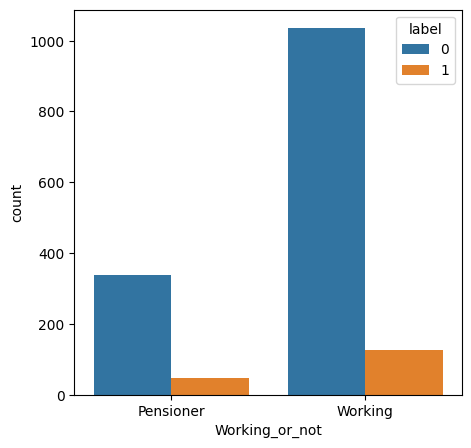

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data_cat1['Working_or_not'],hue=data['label'],data=data)
plt.show()

In [ ]:
d1 = (data_cat1,data_num1)
data1 = pd.concat(d1,axis=1)

In [ ]:
data1.head()

GENDER  Car_Owner  Propert_Owner           Type_Income  EDUCATION  \
0       1          1              1             Pensioner          4   
1       0          1              0  Commercial associate          4   
2       0          1              0  Commercial associate          4   
3       0          1              0  Commercial associate          4   
4       0          1              0  Commercial associate          4   

   Marital_status  Own_House Working_or_not  CHILDREN  Annual_income    Age  \
0               1          1      Pensioner         0   180000.00000  51.43   
1               1          1        Working         0   315000.00000  37.14   
2               1          1        Working         0   315000.00000    NaN   
3               1          1        Working         0   191399.32623  37.14   
4               1          1        Working         0   315000.00000  37.14   

   Employed_days  Family_Members  label  
0           0.00               2      1  
1           1.61               2      1  
2           1.61               2      1  
3           1.61               2      1  
4           1.61               2      1

In [ ]:
data1=data1.drop(['Type_Income'],axis=1)

In [ ]:
columns = ['Age']
data1=data1.dropna(subset=columns)

In [ ]:
data1['CHILDREN'].value_counts()

CHILDREN
0     1074
1      303
2      131
3       16
4        1
14       1
Name: count, dtype: int64

In [ ]:
data1['Family_Members'].value_counts()

Family_Members
2     788
1     331
3     266
4     124
5      15
6       1
15      1
Name: count, dtype: int64

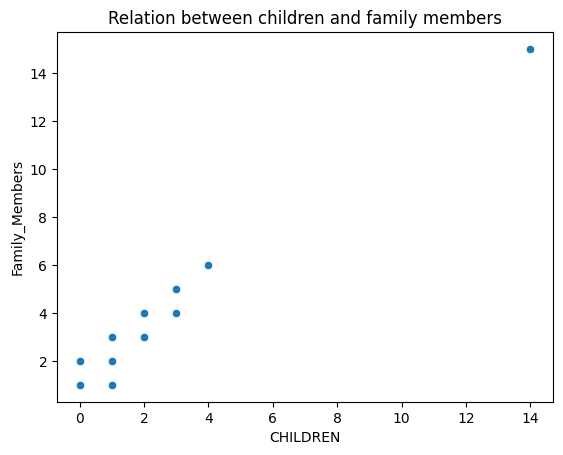

In [ ]:
sns.scatterplot(x=data1['CHILDREN'],y=data1['Family_Members'],data=data1)
plt.title('Relation between children and family members')
plt.show()

In [ ]:
data1[data1['CHILDREN']==14] # appears rare case

GENDER  Car_Owner  Propert_Owner  EDUCATION  Marital_status  Own_House  \
565       1          1              1          1               2          1   

    Working_or_not  CHILDREN  Annual_income    Age  Employed_days  \
565        Working        14       225000.0  48.64           4.63   

     Family_Members  label  
565              15      0

In [ ]:
data1.shape

(1526, 13)

In [ ]:
data2=data1[~ (data1['CHILDREN']> 4)]# drop the row

In [ ]:
data2.shape

(1525, 13)

# Discreatization

In [ ]:
# Discreatization
bins = [20,30,40,50,60,70]
labels = ['20+','30+','40+','50+','60+']
data2['Age_bins']= pd.cut(data2['Age'],bins=bins,labels=labels,right=False)
data2['Age_bins'].value_counts()

Age_bins
30+    428
40+    389
50+    336
20+    209
60+    163
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data2['Age_bins'],hue=data2['label'],data=data2)
plt.show()

<Axes: xlabel='Employed_days', ylabel='Count'>

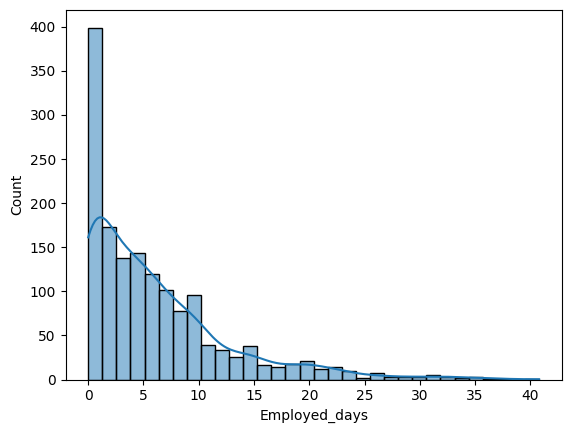

In [ ]:
sns.histplot(data=data2['Employed_days'],kde=True)

In [ ]:
bins = [0,10,20,30,40,50]
labels = ['0+','10+','20+','30+','40+']
data2['Experience']= pd.cut(data2['Employed_days'],bins=bins,labels=labels,right=False)
data2['Experience'].value_counts()

Experience
0+     1225
10+     222
20+      62
30+      15
40+       1
Name: count, dtype: int64

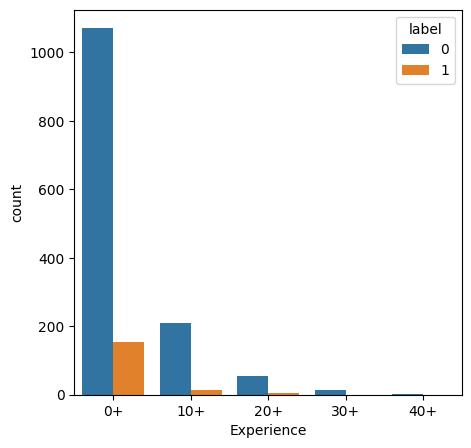

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data2['Experience'],hue=data2['label'],data=data2)
plt.show()

Preprocessing

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data2['Experience']= label_encoder.fit_transform(data2['Experience'])


In [ ]:
data2['Age_bins'] = label_encoder.fit_transform(data2['Age_bins'])

In [ ]:
data2['Experience'].value_counts()

Experience
0    1225
1     222
2      62
3      15
4       1
Name: count, dtype: int64

In [ ]:
data2.head()

GENDER  Car_Owner  Propert_Owner  EDUCATION  Marital_status  Own_House  \
0       1          1              1          4               1          1   
1       0          1              0          4               1          1   
3       0          1              0          4               1          1   
4       0          1              0          4               1          1   
5       0          1              0          4               1          1   

  Working_or_not  CHILDREN  Annual_income    Age  Employed_days  \
0      Pensioner         0   180000.00000  51.43           0.00   
1        Working         0   315000.00000  37.14           1.61   
3        Working         0   191399.32623  37.14           1.61   
4        Working         0   315000.00000  37.14           1.61   
5      Pensioner         0   315000.00000  37.14           1.61   

   Family_Members  label  Age_bins  Experience  
0               2      1         3           0  
1               2      1         1           0  
3               2      1         1           0  
4               2      1         1           0  
5               2      1         1           0

In [ ]:
data3=data2.drop(['Employed_days','Age'],axis=1)

In [ ]:
data3['Marital_status'].value_counts()

Marital_status
1    1131
0     225
2     169
Name: count, dtype: int64

Treating Outlier

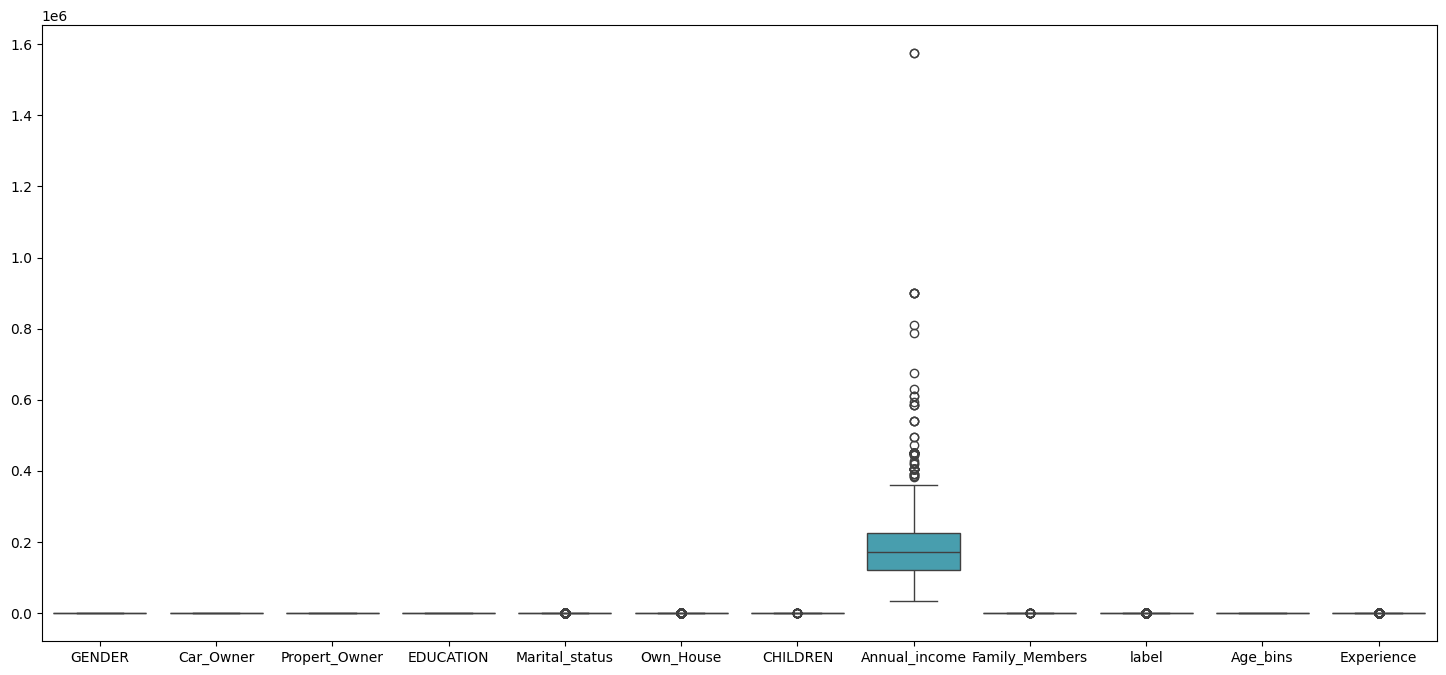

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data3)
plt.show()

In [ ]:
data3['Own_House'].value_counts()

1    1358
0     167
Name: Own_House, dtype: int64

In [ ]:
data3['Experience'].skew()

2.506445377713573

In [ ]:
data3['Own_House'].skew()

-2.503405159324225

In [ ]:
data3['Working_or_not'].skew()

-1.1568486387684582

In [ ]:
# Data Transformation for Normalization


In [ ]:
data3['Annual_income'].mode()

0    135000.0
Name: Annual_income, dtype: float64

In [ ]:
range=(data3['Annual_income'].max()-data3['Annual_income'].min())
range

1541250.0

In [ ]:
data3['Annual_income'].var()

12680810388.626183

In [ ]:
data3['Annual_income'].std()

112609.1043771603

In [ ]:
data3['Annual_income'].skew()

3.9769651172341542

In [ ]:
data3['CHILDREN'].skew()

1.6613789316149776

In [ ]:
# treating skewed data
data3['Annual_income_log']= round(np.log(data3['Annual_income']),2)
data3['Annual_income_log'].skew()

0.1898193563629289

In [ ]:
data3.head()

GENDER  Car_Owner  Propert_Owner  EDUCATION  Marital_status  Own_House  \
0       1          1              1          4               1          1   
1       0          1              0          4               1          1   
3       0          1              0          4               1          1   
4       0          1              0          4               1          1   
5       0          1              0          4               1          1   

  Working_or_not  CHILDREN  Annual_income  Family_Members  label  Age_bins  \
0      Pensioner         0   180000.00000               2      1         3   
1        Working         0   315000.00000               2      1         1   
3        Working         0   191399.32623               2      1         1   
4        Working         0   315000.00000               2      1         1   
5      Pensioner         0   315000.00000               2      1         1   

   Experience  Annual_income_log  
0           0              12.10  
1           0              12.66  
3           0              12.16  
4           0              12.66  
5           0              12.66

In [ ]:
cols=['CHILDREN','Family_Members','Annual_income_log']
def cat_unique(col=cols):
  sns.boxplot(data3[cols])

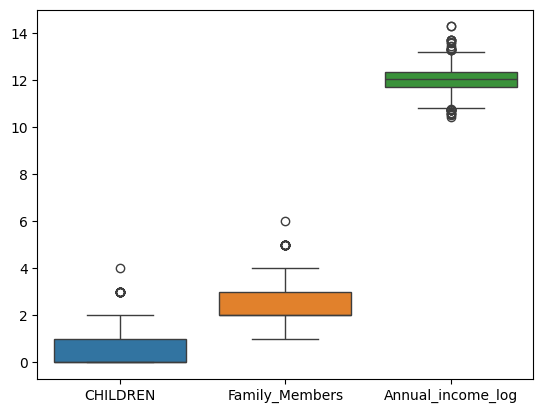

In [ ]:
cat_unique(col=cols)

In [ ]:
def rem_out(data3,col):
  q1=data3[col].quantile(0.25)
  q3 = data3[col].quantile(0.75)
  IQR = q3 -q1
  u_l = q3+1.5*IQR
  l_l = q1-1.5*IQR
  data3[col]= np.where(data3[col]>u_l,u_l,data3[col])
  data3[col]= np.where(data3[col]<l_l,l_l,data3[col])

In [ ]:
rem_out(data3,'Annual_income_log')

In [ ]:
rem_out(data3,'CHILDREN')

In [ ]:
rem_out(data3,'Family_Members')

In [ ]:
cols=['CHILDREN','Family_Members','Annual_income_log']
def cat_unique(col=cols):
  sns.boxplot(data3[cols])

In [ ]:
cat_unique(col=cols)

In [ ]:
data4=data3.drop(['Annual_income'],axis=1)

In [ ]:
data4['Working_or_not']=data4['Working_or_not'].map({'Working':1,'Pensioner':0})

In [ ]:
data4.head()

GENDER  Car_Owner  Propert_Owner  EDUCATION  Marital_status  Own_House  \
0       1          1              1          4               1          1   
1       0          1              0          4               1          1   
3       0          1              0          4               1          1   
4       0          1              0          4               1          1   
5       0          1              0          4               1          1   

   Working_or_not  CHILDREN  Family_Members  label  Age_bins  Experience  \
0               0       0.0             2.0      1         3           0   
1               1       0.0             2.0      1         1           0   
3               1       0.0             2.0      1         1           0   
4               1       0.0             2.0      1         1           0   
5               0       0.0             2.0      1         1           0   

   Annual_income_log  
0              12.10  
1              12.66  
3              12.16  
4              12.66  
5              12.66

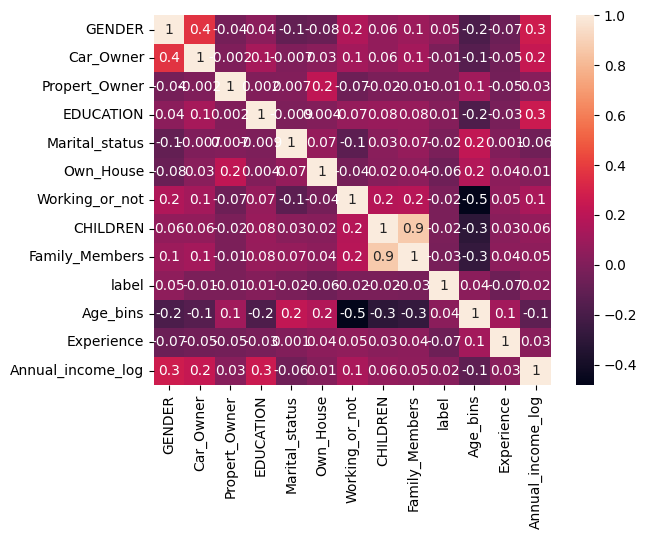

In [ ]:
sns.heatmap(data4.corr(),annot = True,fmt='0.1g')
plt.show()

In [ ]:
data4['label'].value_counts()

label
0    1352
1     173
Name: count, dtype: int64

In [ ]:
# imbalance data
class_0= data4[data4['label']==0]
class_1 = data4[data4['label']==1]
print(class_0.shape)
class_1.shape

(1352, 13)


(173, 13)

In [ ]:
data_class_0= data4.sample(173)
data5= pd.concat([data_class_0,class_1],axis=0)
data4['label'].value_counts()

label
0    1352
1     173
Name: count, dtype: int64

In [ ]:
data5['label'].value_counts()

label
1    194
0    152
Name: count, dtype: int64

Train test split

In [ ]:
# train test split
X = data4.drop('label',axis=1)
y = data4.label
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size = 0.2,random_state = 1)

In [ ]:
X_train

GENDER  Car_Owner  Propert_Owner  EDUCATION  Marital_status  Own_House  \
403        0          0              0          1               0          0   
1091       0          0              1          1               1          1   
499        0          0              1          1               1          1   
1501       0          0              1          1               0          1   
941        1          1              1          4               1          1   
...      ...        ...            ...        ...             ...        ...   
726        0          0              0          1               1          1   
921        0          0              0          1               1          1   
1114       0          1              0          1               1          1   
238        1          1              0          1               1          1   
1078       0          1              0          4               1          1   

      Working_or_not  CHILDREN  Family_Members  Age_bins  Experience  \
403                1       1.0             2.0         1           1   
1091               1       2.0             4.0         1           0   
499                1       0.0             2.0         0           0   
1501               0       0.0             1.0         4           0   
941                1       0.0             2.0         0           0   
...              ...       ...             ...       ...         ...   
726                1       2.0             4.0         1           0   
921                1       0.0             2.0         1           0   
1114               1       1.0             3.0         2           0   
238                1       0.0             2.0         2           1   
1078               1       0.0             2.0         1           0   

      Annual_income_log  
403               11.97  
1091              11.12  
499               12.10  
1501              11.97  
941               12.59  
...                 ...  
726               12.32  
921               11.41  
1114              11.41  
238               12.22  
1078              12.79  

[1220 rows x 12 columns]

In [ ]:
y_train.value_counts()

label
0    1082
1     138
Name: count, dtype: int64

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train,X_test

(array([[-0.75106762, -0.8123201 , -1.3676945 , ..., -0.74595937,
          1.23385507, -0.13338077],
        [-0.75106762, -0.8123201 ,  0.73115744, ..., -0.74595937,
         -0.45181479, -1.93214341],
        [-0.75106762, -0.8123201 ,  0.73115744, ..., -1.57707391,
         -0.45181479,  0.14172411],
        ...,
        [-0.75106762,  1.2310418 , -1.3676945 , ...,  0.08515518,
         -0.45181479, -1.31844792],
        [ 1.33143805,  1.2310418 , -1.3676945 , ...,  0.08515518,
          1.23385507,  0.39566707],
        [-0.75106762,  1.2310418 , -1.3676945 , ..., -0.74595937,
         -0.45181479,  1.60189614]]),
 array([[-0.78888556,  1.17593048, -1.40041603, ...,  0.97011838,
         -0.41310107,  0.58805865],
        [-0.78888556,  1.17593048,  0.71407352, ..., -1.46850337,
         -0.41310107,  0.58805865],
        [-0.78888556, -0.85039041,  0.71407352, ..., -1.46850337,
         -0.41310107, -1.37744808],
        ...,
        [-0.78888556, -0.85039041,  0.71407352, ...,  

In [ ]:
y_train,y_test

(403     0
 1091    0
 499     0
 1501    0
 941     0
        ..
 726     0
 921     0
 1114    0
 238     0
 1078    0
 Name: label, Length: 1220, dtype: int64,
 93      1
 1213    0
 203     0
 622     0
 286     0
        ..
 874     0
 135     1
 1134    0
 1311    0
 83      1
 Name: label, Length: 305, dtype: int64)

Feature Selection

In [ ]:
# feature selection usung chi square test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Convert to categorical data by converting data to integers
X = X.astype(int)

#  features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2,k=5)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
# print('Reduced feature number:', X_kbest.shape[1])

Original feature number: 12


In [ ]:
print('Reduced feature number:', X_kbest_features.shape[1])

Reduced feature number: 5


In [ ]:
X_kbest_features

array([[1, 1, 0, 3, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       ...,
       [1, 1, 2, 1, 0],
       [1, 1, 0, 2, 0],
       [0, 1, 0, 2, 0]])

In [ ]:
# FEATURE SELECTION
import statsmodels.api as sm
X_new = sm.add_constant(X_train)
model = sm.OLS(y_train, X_new).fit()
model.pvalues

const    6.013588e-34
x1       2.553139e-01
x2       5.661895e-01
x3       9.226658e-01
x4       2.810470e-01
x5       3.104146e-02
x6       9.369647e-02
x7       7.592398e-01
x8       4.612789e-01
x9       6.736121e-01
x10      2.977668e-02
x11      2.071094e-03
x12      7.837372e-01
dtype: float64

In [ ]:
# values less than 0.05--imp-x1,x2,x4,x8,x7,x9,x12 -- so Annual_income_log,Age_bins,Type_income,Family_members,children are imp

In [ ]:
data4.head()

GENDER  Car_Owner  Propert_Owner  EDUCATION  Marital_status  Own_House  \
0       1          1              1          4               1          1   
1       0          1              0          4               1          1   
3       0          1              0          4               1          1   
4       0          1              0          4               1          1   
5       0          1              0          4               1          1   

   Working_or_not  CHILDREN  Family_Members  label  Age_bins  Experience  \
0               0       0.0             2.0      1         3           0   
1               1       0.0             2.0      1         1           0   
3               1       0.0             2.0      1         1           0   
4               1       0.0             2.0      1         1           0   
5               0       0.0             2.0      1         1           0   

   Annual_income_log  
0              12.10  
1              12.66  
3              12.16  
4              12.66  
5              12.66

Modelling

In [ ]:
# MODELS

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

models = [LogisticRegression(max_iter=1000),RandomForestClassifier(random_state=5),KNeighborsClassifier(),SVC(kernel='linear')]
for model in models:
  cv_score=cross_val_score(model,X_train,y_train,cv=5)
  mean = round(sum(cv_score)/len(cv_score)*100,2)

  print(model)
  print('cross validation accuracies',cv_score)
  print('accuaracy_score',mean)
  print('*******************')

LogisticRegression(max_iter=1000)
cross validation accuracies [0.88934426 0.88934426 0.8852459  0.8852459  0.8852459 ]
accuaracy_score 88.69
*******************
RandomForestClassifier(random_state=5)
cross validation accuracies [0.91803279 0.88934426 0.90983607 0.89344262 0.87295082]
accuaracy_score 89.67
*******************
KNeighborsClassifier()
cross validation accuracies [0.87704918 0.87295082 0.88114754 0.8852459  0.86885246]
accuaracy_score 87.7
*******************
SVC(kernel='linear')
cross validation accuracies [0.88934426 0.88934426 0.8852459  0.8852459  0.8852459 ]
accuaracy_score 88.69
*******************


In [ ]:
# Random Forest Classifier  has heighest accuracy
# Applying Grind Search cv
model_list = [LogisticRegression(max_iter=1000),RandomForestClassifier(random_state=5),KNeighborsClassifier(),SVC(kernel='linear')]

# creating dictionary that contain hyper parameter value
hyper_para = {'lr_hypara':{'C':[1,5,10]},'rfc_hypara':{'n_estimators':[20,50,100]},'kn_hypara':{'n_neighbors':[5,10]},'svc_hypara':{'kernel':['linear','poly','rbf'],'C':[1,5,10]}}

In [ ]:
model_keys = list(hyper_para.keys())
a = model_keys[3]
hyper_para[a]

{'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 5, 10]}

In [ ]:
best_result =[]
i=0
for model in model_list:
  key = model_keys[i]
  param=hyper_para[key]
  i=i+1
  print(model)
  print(param)
  classifier = GridSearchCV(model,param,cv=5)
  classifier.fit(X_train,y_train)

  best_result.append({'model':model,'highest_score':classifier.best_score_ ,'best_param':classifier.best_params_})

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10]}
RandomForestClassifier(random_state=5)
{'n_estimators': [20, 50, 100]}
KNeighborsClassifier()
{'n_neighbors': [5, 10]}
SVC(kernel='linear')
{'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 5, 10]}


In [ ]:
best_result

[{'model': LogisticRegression(max_iter=1000),
  'highest_score': 0.8868852459016393,
  'best_param': {'C': 1}},
 {'model': RandomForestClassifier(random_state=5),
  'highest_score': 0.8975409836065573,
  'best_param': {'n_estimators': 50}},
 {'model': KNeighborsClassifier(),
  'highest_score': 0.8868852459016393,
  'best_param': {'n_neighbors': 10}},
 {'model': SVC(kernel='linear'),
  'highest_score': 0.8942622950819672,
  'best_param': {'C': 5, 'kernel': 'rbf'}}]

In [ ]:
# Model Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(random_state=5,n_estimators=100)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=5)

In [ ]:
# prediction
prediction = rfc.predict(X_test)

In [ ]:
cv_score = cross_val_score(rfc,X_train,y_train,cv=5)
print('model_accuracy')
print('Training_accuracy',rfc.score(X_train,y_train))
print('cross_validation_accuracy',cv_score.mean())
print('Testing_accuracy:',accuracy_score(y_test,prediction))

model_accuracy
Training_accuracy 0.9762295081967213
cross_validation_accuracy 0.8967213114754099
Testing_accuracy: 0.8918032786885246


In [ ]:
print('RandomForest Classifier Report')
print('---------------------------------------')
print(classification_report(y_test,prediction))

RandomForest Classifier Report
---------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       270
           1       0.55      0.31      0.40        35

    accuracy                           0.89       305
   macro avg       0.73      0.64      0.67       305
weighted avg       0.87      0.89      0.88       305



In [ ]:
print('RandomForest Classifier Confusion Metrix')
print('---------------------')
cm= confusion_matrix(y_test, prediction)
print(cm)

RandomForest Classifier Confusion Metrix
---------------------
[[261   9]
 [ 24  11]]


In [ ]:
# Decision Tree Classifier
# initialize a decision tree classiier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# make prediction on the testing data
y_pred = model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print('accuracy',accuracy)

accuracy 0.8557377049180328


In [ ]:
# modellig
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

# prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
# evalution
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8950819672131147
test accuracy: 0.8622950819672132


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5)
print('scores:',scores)

scores: [0.82295082 0.79344262 0.8295082  0.81639344 0.77704918]


In [ ]:
# print the cross validation scores
print('cross validation score',cross_val_score(model,X,y,cv=5).mean())

cross validation score 0.8078688524590163


In [ ]:
# modellig
# SVC
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

# prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
# evalution
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8868852459016393
test accuracy: 0.8852459016393442


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5)
print('scores:',scores)

# print the cross validation scores
print('cross validation score',cross_val_score(model,X,y,cv=5).mean())

scores: [0.8852459  0.8852459  0.8852459  0.88852459 0.88852459]
cross validation score 0.8865573770491804


In [ ]:
print('SVC')
print('---------------------------------------')
print(classification_report(y_test,prediction))

SVC
---------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       270
           1       0.55      0.31      0.40        35

    accuracy                           0.89       305
   macro avg       0.73      0.64      0.67       305
weighted avg       0.87      0.89      0.88       305



In [ ]:
# Modelling
# XGBClassifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

# making prediction
y_pred = model.predict(X_test)

# calculate mean square error(MSE)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8868852459016393
test accuracy: 0.8852459016393442


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5)
print('scores:',scores)

# print the cross validation scores
print('cross validation score',cross_val_score(model,X,y,cv=5).mean())

scores: [0.84262295 0.87213115 0.86557377 0.85901639 0.83606557]
cross validation score 0.8550819672131148


MOST APPROPRIATE MODEL

In [ ]:

# Good Model have
# 1.test_accuracy= train_accuracy
# 2.test_accuracy = cross_val_score
# 3.accuracy should satisfy bussiness problem

# so here SVC support vactor machine model is good model

Most Appropriate Model

SVC Support Vector Machine is the most Appropriate model because
* Train accuracy: 0.8868852459016393

* Test accuracy: 0.8852459016393442

Train and Test accuracy are nearly similar

Cross validation score is 0.8865573770491804

Accuracy score is 88.69

SVC
---------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       270
           1       0.55      0.31      0.40        35

    accuracy                           0.89       305
   macro avg       0.73      0.64      0.67       305
weighted avg       0.87      0.89      0.88       305
